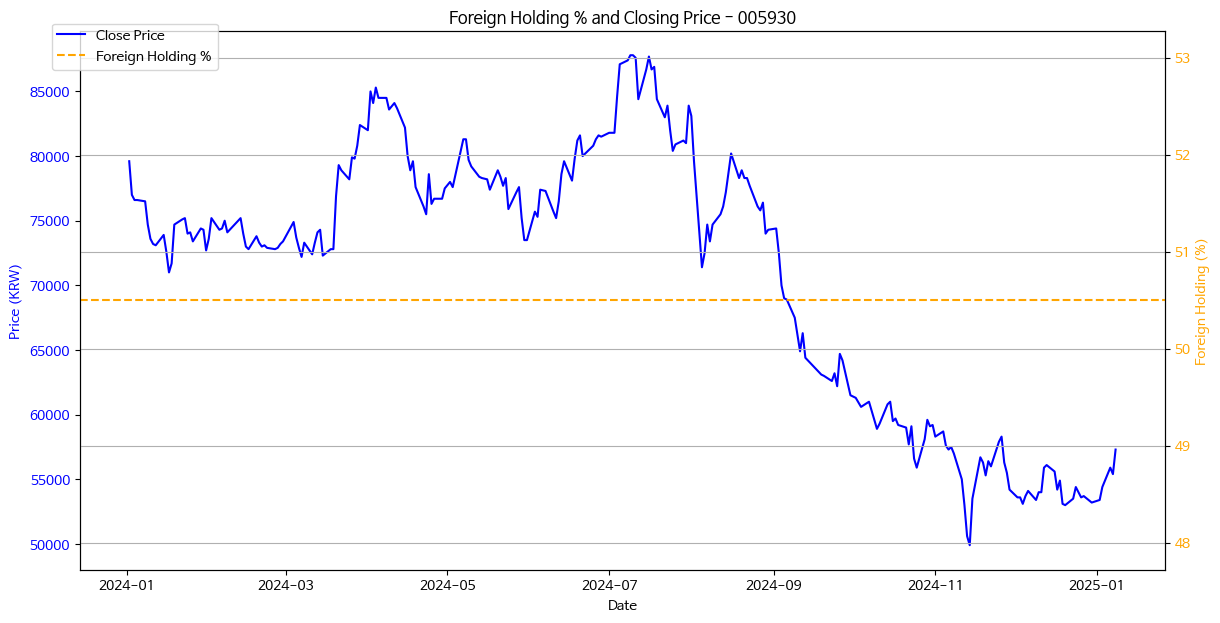

In [1]:
from pykrx import stock
import matplotlib.pyplot as plt

# 날짜와 티커 설정
date = "20250108"
ticker = "005930"  # 삼성전자 예시

# 외국인 보유율 데이터 가져오기
foreign_data = stock.get_exhaustion_rates_of_foreign_investment(date)
foreign_holding = foreign_data.loc[ticker]['지분율']

# 주가 데이터 가져오기 (삼성전자의 1년치 일별 종가 데이터 예시)
price_data = stock.get_market_ohlcv_by_date("20240101", "20250108", ticker)
price_data = price_data[['종가']]

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 7))

# 첫 번째 축: 주가
ax1.plot(price_data.index, price_data['종가'], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (KRW)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 축: 외국인 보유율
ax2 = ax1.twinx()
ax2.axhline(y=foreign_holding, color='orange', linestyle='--', label='Foreign Holding %')
ax2.set_ylabel('Foreign Holding (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 그래프 제목과 범례
plt.title(f"Foreign Holding % and Closing Price - {ticker}")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid(True)

# 그래프 출력
plt.show()


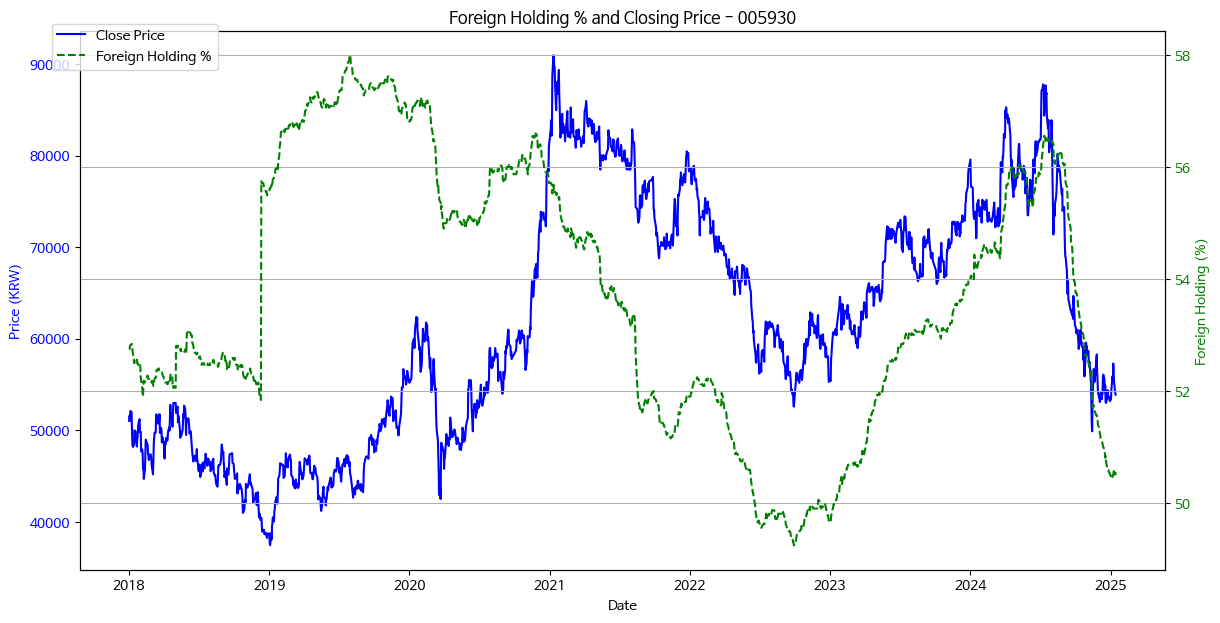

In [2]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker and date range
ticker = "005930"  # Samsung Electronics
start_date = "20180101"
end_date = "20250114"

# Fetch daily close prices
price_data = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)['종가']

# Initialize an empty DataFrame to store foreign holding percentages
foreign_holding_data = pd.DataFrame(index=price_data.index)

foreign_holding_data = stock.get_exhaustion_rates_of_foreign_investment(start_date, end_date, "005930")


# Merge price data and foreign holding data
combined_data = pd.concat([price_data, foreign_holding_data], axis=1)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# First y-axis: Closing price
ax1.plot(combined_data.index, combined_data['종가'], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (KRW)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Second y-axis: Foreign holding percentage
ax2 = ax1.twinx()
ax2.plot(combined_data.index, combined_data['지분율'], color='green', linestyle='--', label='Foreign Holding %')
ax2.set_ylabel('Foreign Holding (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and legend
plt.title(f"Foreign Holding % and Closing Price - {ticker}")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid(True)

# Show plot
plt.show()



            Foreign Holding %  Foreign Holding Change Action
날짜                                                          
2020-01-09           57.00000                 0.09375    Buy
2020-01-31           57.25000                 0.09375    Buy
2020-02-25           57.00000                -0.12500   Sell
2020-02-27           56.78125                -0.12500   Sell
2020-03-03           56.50000                -0.12500   Sell


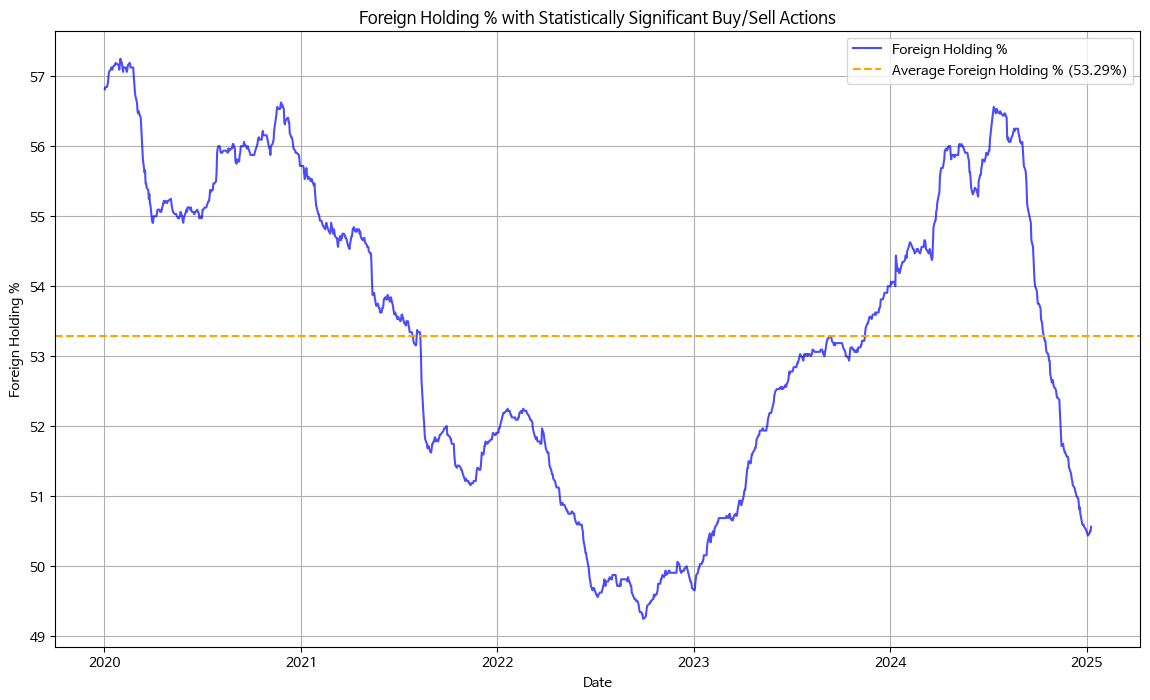

In [4]:
from pykrx import stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: 데이터 가져오기
ticker = "005930"  # 삼성전자
start_date = "20200101"
end_date = "20250109"

# 종가 데이터 가져오기
price_data = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)['종가']

# 외국인 보유 비중 데이터 가져오기
foreign_holding_data = stock.get_exhaustion_rates_of_foreign_investment_by_date(start_date, end_date, ticker)

# 데이터 병합
combined_data = pd.merge(price_data, foreign_holding_data[['지분율']], left_index=True, right_index=True)
combined_data.rename(columns={'지분율': 'Foreign Holding %'}, inplace=True)
combined_data.index = pd.to_datetime(combined_data.index)

# Step 2: 지분율 변화 계산
combined_data['Foreign Holding Change'] = combined_data['Foreign Holding %'].diff()

# Step 3: 통계적 유의미한 변화 판단 기준 설정
mean_change = combined_data['Foreign Holding Change'].mean()
std_change = combined_data['Foreign Holding Change'].std()

# 평균 ± 2σ 이상인 경우만 매수/매도 신호로 간주
combined_data['Action'] = np.where(
    combined_data['Foreign Holding Change'] > mean_change + 1.5 * std_change, 'Buy',
    np.where(combined_data['Foreign Holding Change'] < mean_change - 1.5 * std_change, 'Sell', 'Hold')
)

# Step 4: 매수/매도 패턴 분석
results = combined_data[combined_data['Action'].isin(['Buy', 'Sell'])]
print(results[['Foreign Holding %', 'Foreign Holding Change', 'Action']].head())


# Filter Buy/Sell actions only
filtered_results = combined_data[combined_data['Action'].isin(['Buy', 'Sell'])]


mian = combined_data['Foreign Holding %'].astype('float64').mean()
# Plot Buy/Sell actions on price chart
plt.figure(figsize=(14, 8))

plt.plot(combined_data.index, combined_data['Foreign Holding %'], label='Foreign Holding %', color='blue', alpha=0.7)

plt.axhline(y=mian, color='orange', linestyle='--', label=f'Average Foreign Holding % ({mian:.2f}%)')



# plt.scatter(filtered_results.index, filtered_results['Foreign Holding %'],
#             c=np.where(filtered_results['Action'] == 'Buy', 'green', 'red'), marker='o', label='Buy/Sell Points')

# Highlight Buy and Sell points
# for i, row in filtered_results.iterrows():
#     plt.text(i, row['Foreign Holding %'], row['Action'], fontsize=9, ha='center', color='black', alpha=0.7)

# Add titles and labels
plt.title('Foreign Holding % with Statistically Significant Buy/Sell Actions')
plt.xlabel('Date')
plt.ylabel('Foreign Holding %')
plt.legend()
plt.grid(True)
plt.show()
